In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import dabest

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = 11.7,8.27
import matplotlib.pyplot as plt

from statsmodels.stats.multitest import multipletests
from matplotlib_venn import venn3


/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Data preparation

In [2]:
comps = pd.read_feather('/Users/Oliver/Google Drive/hippnac/data/final_submission/comps.feather')
psth_ds = pd.read_feather('/Users/Oliver/Google Drive/hippnac/data/final_submission/psth_ds.feather')

In [3]:
comps.loc[~comps.VeloCorrelationP.isnull(), 'VeloCorrelationP_adj'] = multipletests(comps['VeloCorrelationP'].dropna().values, method='fdr_bh')[1]  # fdr_bh
comps['SpeedCell'] = comps.VeloCorrelationP_adj<.05
comps.loc[(comps.VeloCorrelation<0)&(comps.SpeedCell), 'SpeedCell'] = -1
comps['SpeedCell_n'] = comps.SpeedCell==-1
comps['SpeedCell_p'] = comps.SpeedCell==True
comps['PlaceCell'] = comps.PlaceScoreShufflingPercentile>95

comps['RedC'] = 'Green'
comps.loc[comps.Red==1, 'RedC'] = 'Red'
comps.Red = comps.Red.astype(bool)

# Fig 7A: Venn diagram

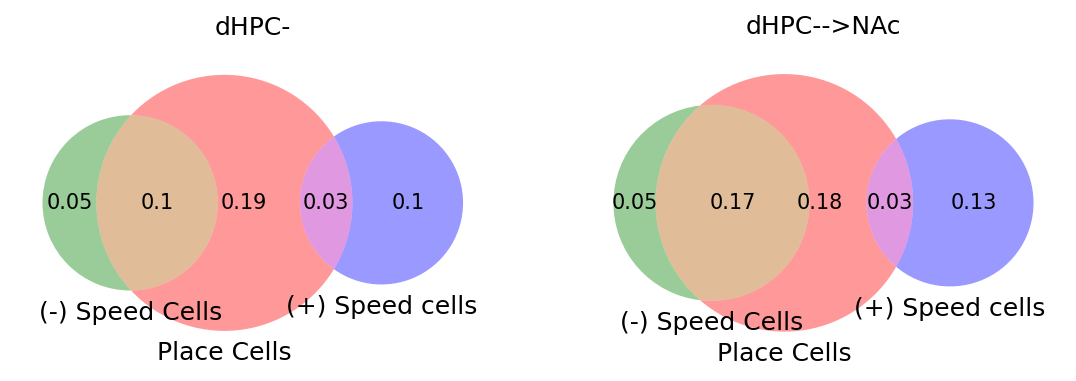

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(9,6))

#Abc, aBc, ABc, abC, AbC, aBC, ABC)

comp1 = comps.loc[~(comps.Red.astype(bool)), 'PlaceCell']
comp2 = comps.loc[~(comps.Red.astype(bool)), 'SpeedCell']==-1
comp3 = (comps.loc[~(comps.Red.astype(bool)), 'SpeedCell'])==1
joint12 = comps.loc[~(comps.Red) & (comp1) & (comp2)].count()[0] / (~comps.Red).sum()
joint13 = comps.loc[~(comps.Red) & (comp1) & (comp3)].count()[0] / (~comps.Red).sum()
joint23 = comps.loc[~(comps.Red) & (comp2) & (comp3)].count()[0] / (~comps.Red).sum()
joint123 = comps.loc[~(comps.Red) & (comp1) & (comp2) & (comp3)].count()[0] / (~comps.Red).sum()
venn3(subsets = (round((comp1.mean()-joint12-joint13)*100)/100,
                 round((comp2.mean()-joint12-joint23)*100)/100,
                 round(joint12*100)/100,
                 round((comp3.mean()-joint13-joint23)*100)/100,
                 round(joint13*100)/100,
                 round(joint23*100)/100,
                 round(joint123*100)/100),
      set_labels = ('Place Cells', '(-) Speed Cells', '(+) Speed cells'), ax=axs[0])
axs[0].set_title('dHPC-');

comp1 = comps.loc[(comps.Red.astype(bool)), 'PlaceCell']
comp2 = comps.loc[(comps.Red.astype(bool)), 'SpeedCell']==-1
comp3 = (comps.loc[(comps.Red.astype(bool)), 'SpeedCell'])==1
joint12 = comps.loc[(comps.Red) & (comp1) & (comp2)].count()[0] / (comps.Red).sum()
joint13 = comps.loc[(comps.Red) & (comp1) & (comp3)].count()[0] / (comps.Red).sum()
joint23 = comps.loc[(comps.Red) & (comp2) & (comp3)].count()[0] / (comps.Red).sum()
joint123 = comps.loc[(comps.Red) & (comp1) & (comp2) & (comp3)].count()[0] / (comps.Red).sum()
venn3(subsets = (round((comp1.mean()-joint12-joint13)*100)/100,
                 round((comp2.mean()-joint12-joint23)*100)/100,
                 round(joint12*100)/100,
                 round((comp3.mean()-joint13-joint23)*100)/100,
                 round(joint13*100)/100,
                 round(joint23*100)/100,
                 round(joint123*100)/100),
      set_labels = ('Place Cells', '(-) Speed Cells', '(+) Speed cells'), ax=axs[1])
axs[1].set_title('dHPC-->NAc');

# Fig 7B: Speed x place cell interaction

(PlaceCell          False         True
SpeedCell_n                          
False        2849.160917  1345.839083
True          497.839083   235.160917, PlaceCell     False    True
SpeedCell_n                
False        3117.5  1077.5
True          229.5   503.5,                  test    lambda        chi2  dof           pval    cramer  \
0             pearson  1.000000  529.610318  1.0  3.433416e-117  0.327826   
1        cressie-read  0.666667  512.459283  1.0  1.849898e-113  0.322474   
2      log-likelihood  0.000000  493.181809  1.0  2.893951e-109  0.316350   
3       freeman-tukey -0.500000  490.854366  1.0  9.287784e-109  0.315603   
4  mod-log-likelihood -1.000000  498.636224  1.0  1.882354e-110  0.318095   
5              neyman -2.000000  546.685788  1.0  6.621705e-121  0.333068   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  )
(PlaceCell         False        True
SpeedCell_n                        
False        214.921171  132.078829
True  

<AxesSubplot:xlabel='Red', ylabel='SpeedCell_n'>

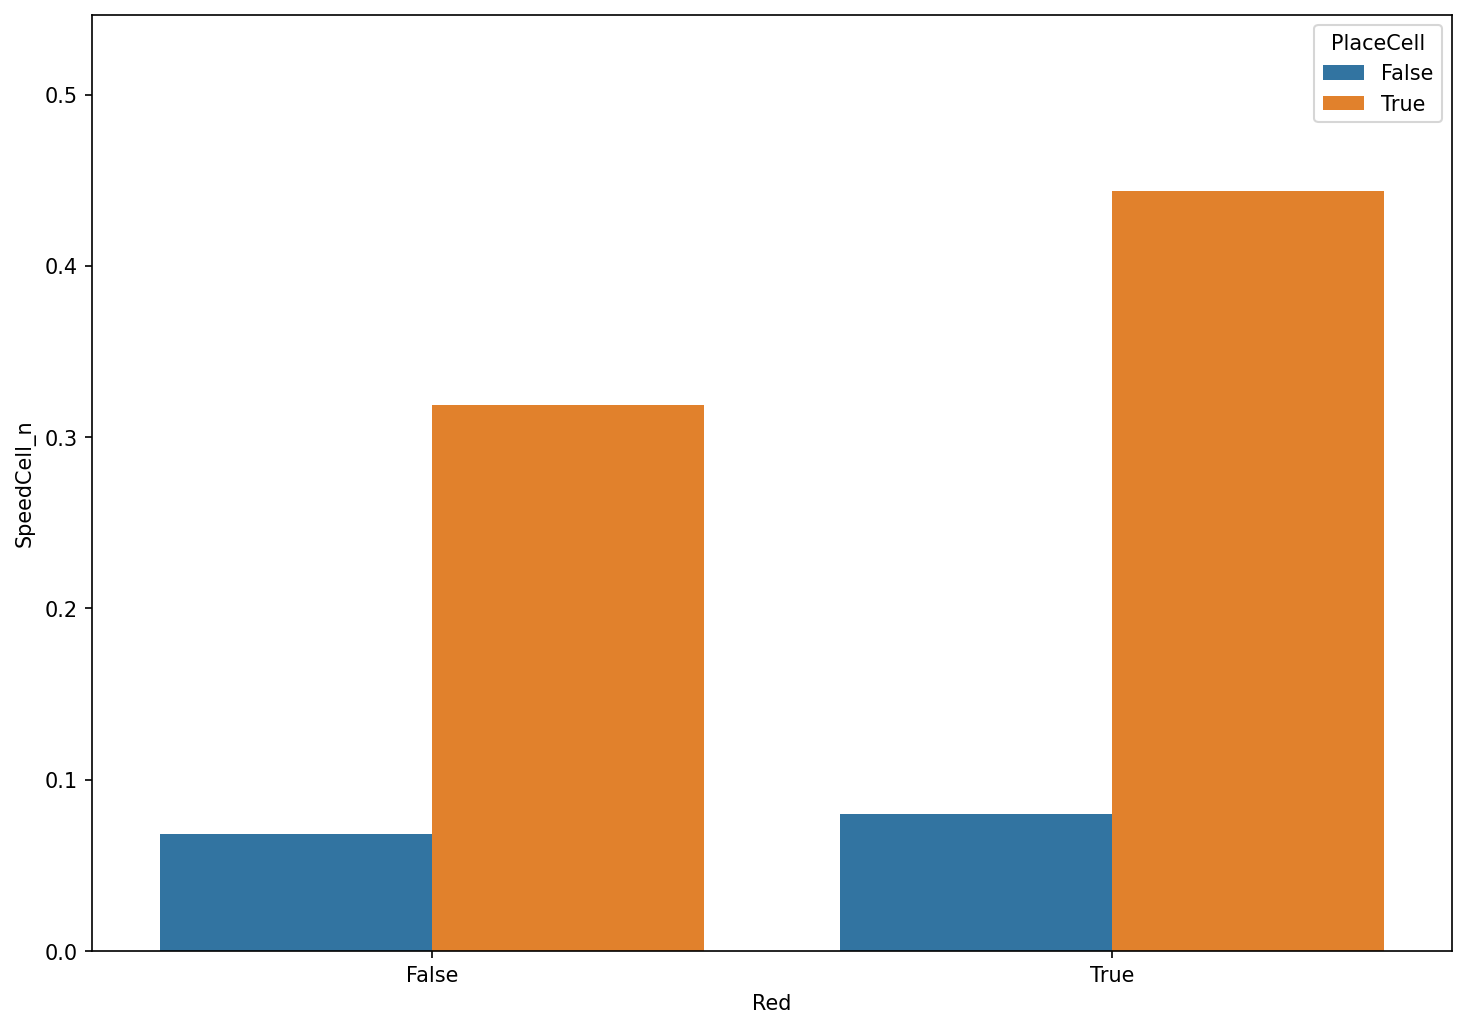

In [5]:
print(pg.chi2_independence(comps.loc[~comps.Red], x='SpeedCell_n', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.Red], x='SpeedCell_n', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.PlaceCell], x='SpeedCell_n', y='Red'))
print(pg.chi2_independence(comps.loc[~comps.PlaceCell], x='SpeedCell_n', y='Red'))
sns.barplot(data=comps, x='Red', hue='PlaceCell', y='SpeedCell_n', errwidth=0)

(PlaceCell          False         True
SpeedCell_p                          
False        2891.270089  1365.729911
True          455.729911   215.270089, PlaceCell     False    True
SpeedCell_p                
False        2838.5  1418.5
True          508.5   162.5,                  test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  22.048244  1.0  2.658828e-06  0.066889   
1        cressie-read  0.666667  22.350778  1.0  2.271211e-06  0.067346   
2      log-likelihood  0.000000  23.014712  1.0  1.607664e-06  0.068339   
3       freeman-tukey -0.500000  23.568198  1.0  1.205638e-06  0.069156   
4  mod-log-likelihood -1.000000  24.173510  1.0  8.803487e-07  0.070038   
5              neyman -2.000000  25.556932  1.0  4.295201e-07  0.072014   

      power  
0  0.996887  
1  0.997177  
2  0.997726  
3  0.998103  
4  0.998445  
5  0.999017  )
(PlaceCell         False        True
SpeedCell_p                        
False        229.786036  141.213964

<AxesSubplot:xlabel='Red', ylabel='SpeedCell_p'>

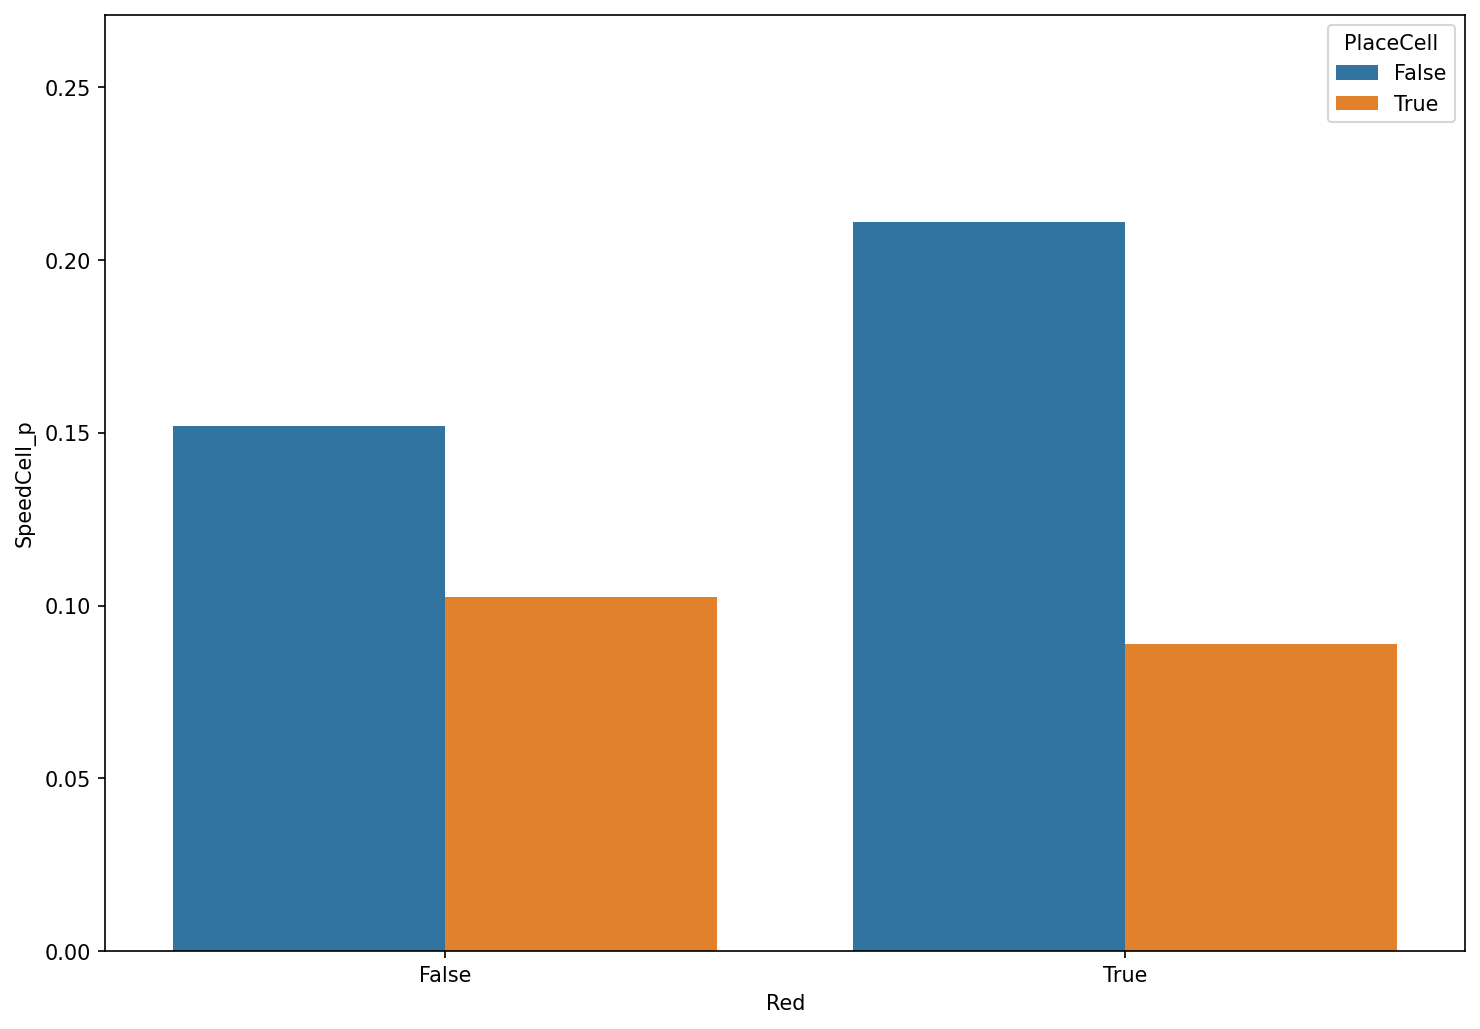

In [6]:
print(pg.chi2_independence(comps.loc[~comps.Red], x='SpeedCell_p', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.Red], x='SpeedCell_p', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.PlaceCell], x='SpeedCell_p', y='Red'))
print(pg.chi2_independence(comps.loc[~comps.PlaceCell], x='SpeedCell_p', y='Red'))
sns.barplot(data=comps, x='Red', hue='PlaceCell', y='SpeedCell_p', errwidth=0)

## Fig S10B

In [7]:
speedcells_n_df = pd.DataFrame({'red_place': comps.loc[(comps.Red)&(comps.PlaceCell), 'SpeedCell_n'],
                             'red_nonplace': comps.loc[(comps.Red)&(~comps.PlaceCell), 'SpeedCell_n'],
                             'green_place': comps.loc[(~comps.Red)&(comps.PlaceCell), 'SpeedCell_n'],
                             'green_nonplace': comps.loc[(~comps.Red)&(~comps.PlaceCell), 'SpeedCell_n'],
                             })

In [8]:
speedcells_n = dabest.load(speedcells_n_df.astype(float), idx=(("red_place", "red_nonplace"),
                                             ("green_place", "green_nonplace")), proportional=True)
speedcells_n.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,red_nonplace,169,275,Cohen's h,None,-0.884619,95,-1.074177,-0.689467,0.0,5.380749e-16,8.726394,3.771068e-21,9.941110,2.326398e-19,31691.0
1,green_place,green_nonplace,1581,3347,Cohen's h,None,-0.670624,95,-0.731369,-0.611953,0.0,1.808681e-81,20.013733,2.769580e-124,24.405325,1.347687e-117,3308223.0


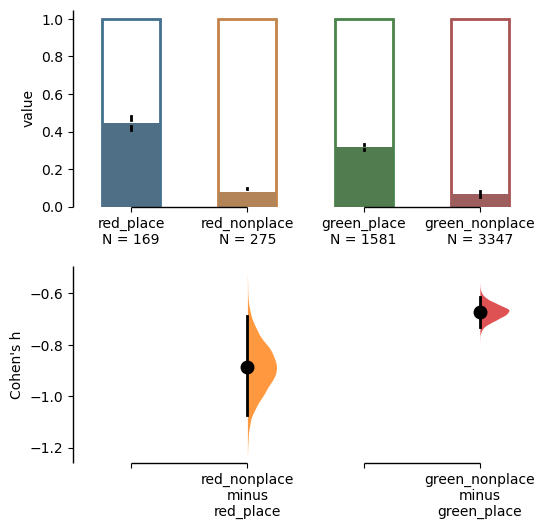

In [9]:
speedcells_n.cohens_h.plot();

In [10]:
speedcells_n_T = dabest.load(speedcells_n_df.astype(float), idx=(("red_place", "green_place"),
                                             ("red_nonplace", "green_nonplace")), proportional=True)
speedcells_n_T.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,green_place,169,1581,Cohen's h,None,-0.258208,95,-0.417740,-0.104122,0.0012,0.002085,3.118483,0.001018,3.290928,0.001032,150294.0
1,red_nonplace,green_nonplace,275,3347,Cohen's h,None,-0.044214,95,-0.175979,0.075337,0.4570,0.495243,0.682789,0.467419,0.726762,0.467385,465542.0


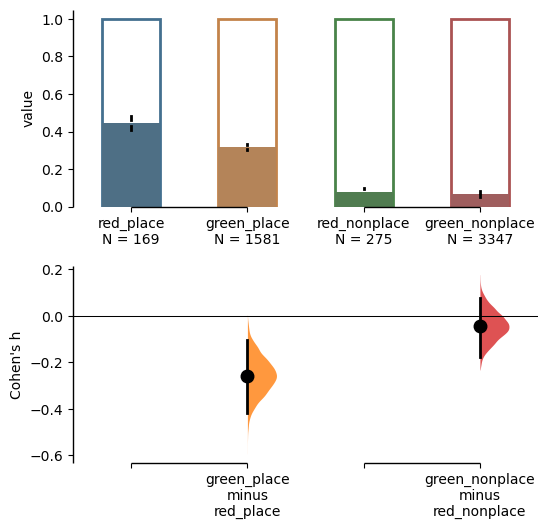

In [11]:
speedcells_n_T.cohens_h.plot();

## Fig S10A

In [12]:
speedcells_p_df = pd.DataFrame({'red_place': comps.loc[(comps.Red)&(comps.PlaceCell), 'SpeedCell_p'],
                             'red_nonplace': comps.loc[(comps.Red)&(~comps.PlaceCell), 'SpeedCell_p'],
                             'green_place': comps.loc[(~comps.Red)&(comps.PlaceCell), 'SpeedCell_p'],
                             'green_nonplace': comps.loc[(~comps.Red)&(~comps.PlaceCell), 'SpeedCell_p'],
                             })

In [13]:
speedcells_p = dabest.load(speedcells_p_df.astype(float), idx=(("red_place", "red_nonplace"),
                                             ("green_place", "green_nonplace")), proportional=True)
speedcells_p.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,red_nonplace,169,275,Cohen's h,None,0.349268,95,0.149061,0.536865,0.0,2.415188e-04,-3.701870,0.000714,-3.408038,0.000759,20399.0
1,green_place,green_nonplace,1581,3347,Cohen's h,None,0.149518,95,0.089844,0.206584,0.0,4.790037e-07,-5.043722,0.000002,-4.749925,0.000002,2514546.0


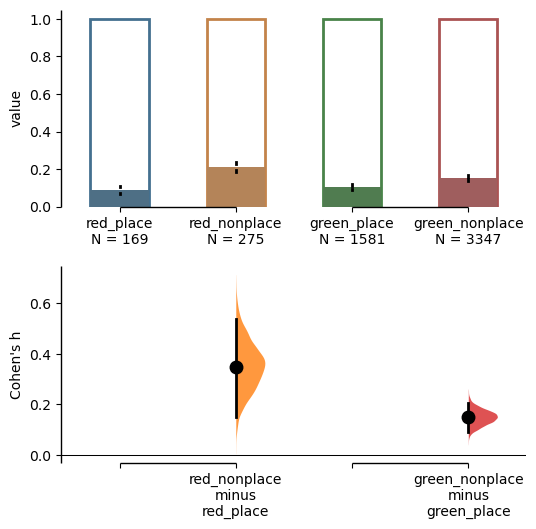

In [14]:
speedcells_p.cohens_h.plot();

In [15]:
speedcells_p_T = dabest.load(speedcells_p_df.astype(float), idx=(("red_place", "green_place"),
                                             ("red_nonplace", "green_nonplace")), proportional=True)
speedcells_p_T.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,green_place,169,1581,Cohen's h,None,0.04665,95,-0.129449,0.190918,0.4978,0.555716,-0.590159,0.574496,-0.561548,0.574454,131763.0
1,red_nonplace,green_nonplace,275,3347,Cohen's h,None,-0.15310,95,-0.279037,-0.030878,0.0106,0.021274,2.314856,0.009843,2.582672,0.009863,487288.0


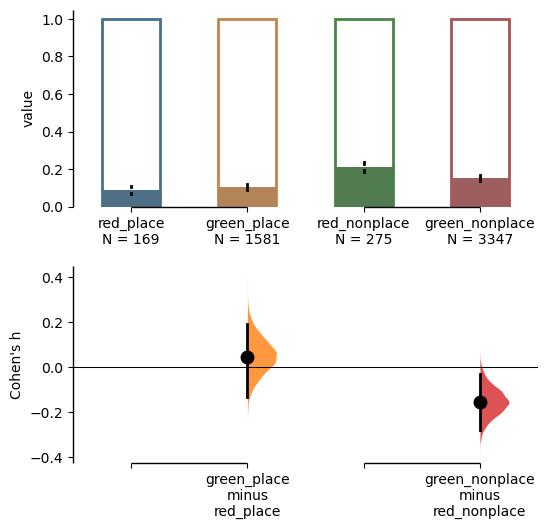

In [16]:
speedcells_p_T.cohens_h.plot();

# Fig 7C

In [17]:
psth_ds = psth_ds.rename(columns={'CellID':'NeuronID'})
if 'ExpID' in psth_ds.columns:
    psth_ds = psth_ds.set_index(['ExpID', 'NeuronID'])
if 'ExpID' in comps.columns:
    comps = comps.set_index(['ExpID', 'NeuronID'])

psth_ds = psth_ds.join(comps['PlaceCell'])

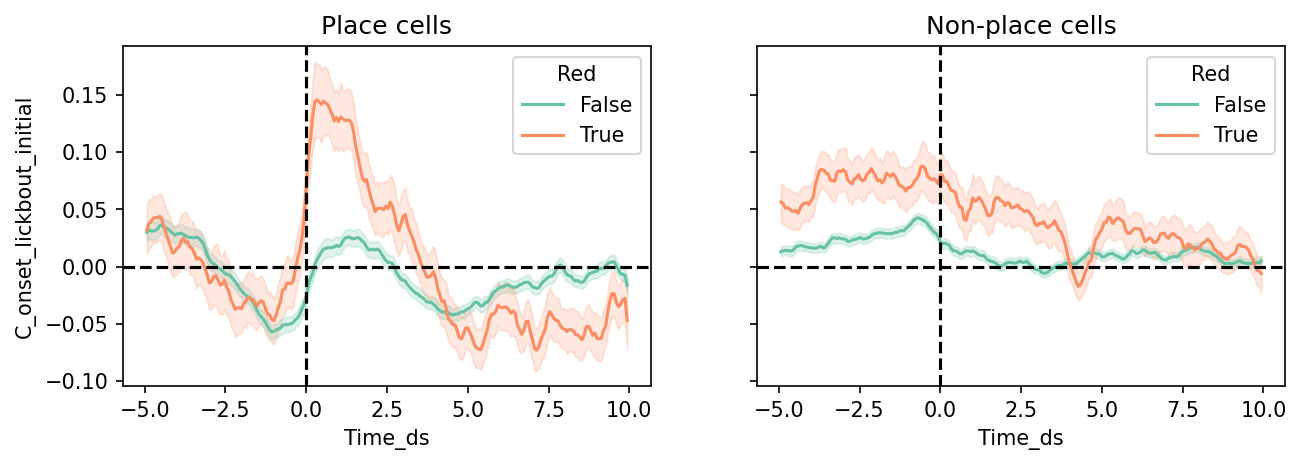

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10,3), sharey=True)

sns.lineplot(data=psth_ds.loc[(psth_ds.PlaceCell)].reset_index(), 
            x='Time_ds', y='C_onset_lickbout_initial', 
            hue='Red', ci=68, palette='Set2', ax=axs[0])
axs[0].set_title('Place cells')

sns.lineplot(data=psth_ds.loc[(~psth_ds.PlaceCell)].reset_index(), 
            x='Time_ds', y='C_onset_lickbout_initial', 
            hue='Red', ci=68, palette='Set2', ax=axs[1])
axs[1].set_title('Non-place cells')

for ax in axs:
    ax.axhline(0, ls='--', c='k')
    ax.axvline(0, ls='--', c='k')

# Fig 7D: Lick x place cell interaction

(PlaceCell                           False         True
C_onset_lickbout_initial_pos                          
False                         3220.672484  1521.327516
True                           126.327516    59.672484, PlaceCell                      False    True
C_onset_lickbout_initial_pos                
False                         3287.5  1454.5
True                            59.5   126.5,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  114.514548  1.0  1.005261e-26  0.152439   
1        cressie-read  0.666667  110.124641  1.0  9.201909e-26  0.149488   
2      log-likelihood  0.000000  104.858295  1.0  1.311903e-24  0.145870   
3       freeman-tukey -0.500000  103.732845  1.0  2.315211e-24  0.145085   
4  mod-log-likelihood -1.000000  104.944178  1.0  1.256256e-24  0.145930   
5              neyman -2.000000  114.789986  1.0  8.748931e-27  0.152622   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0 

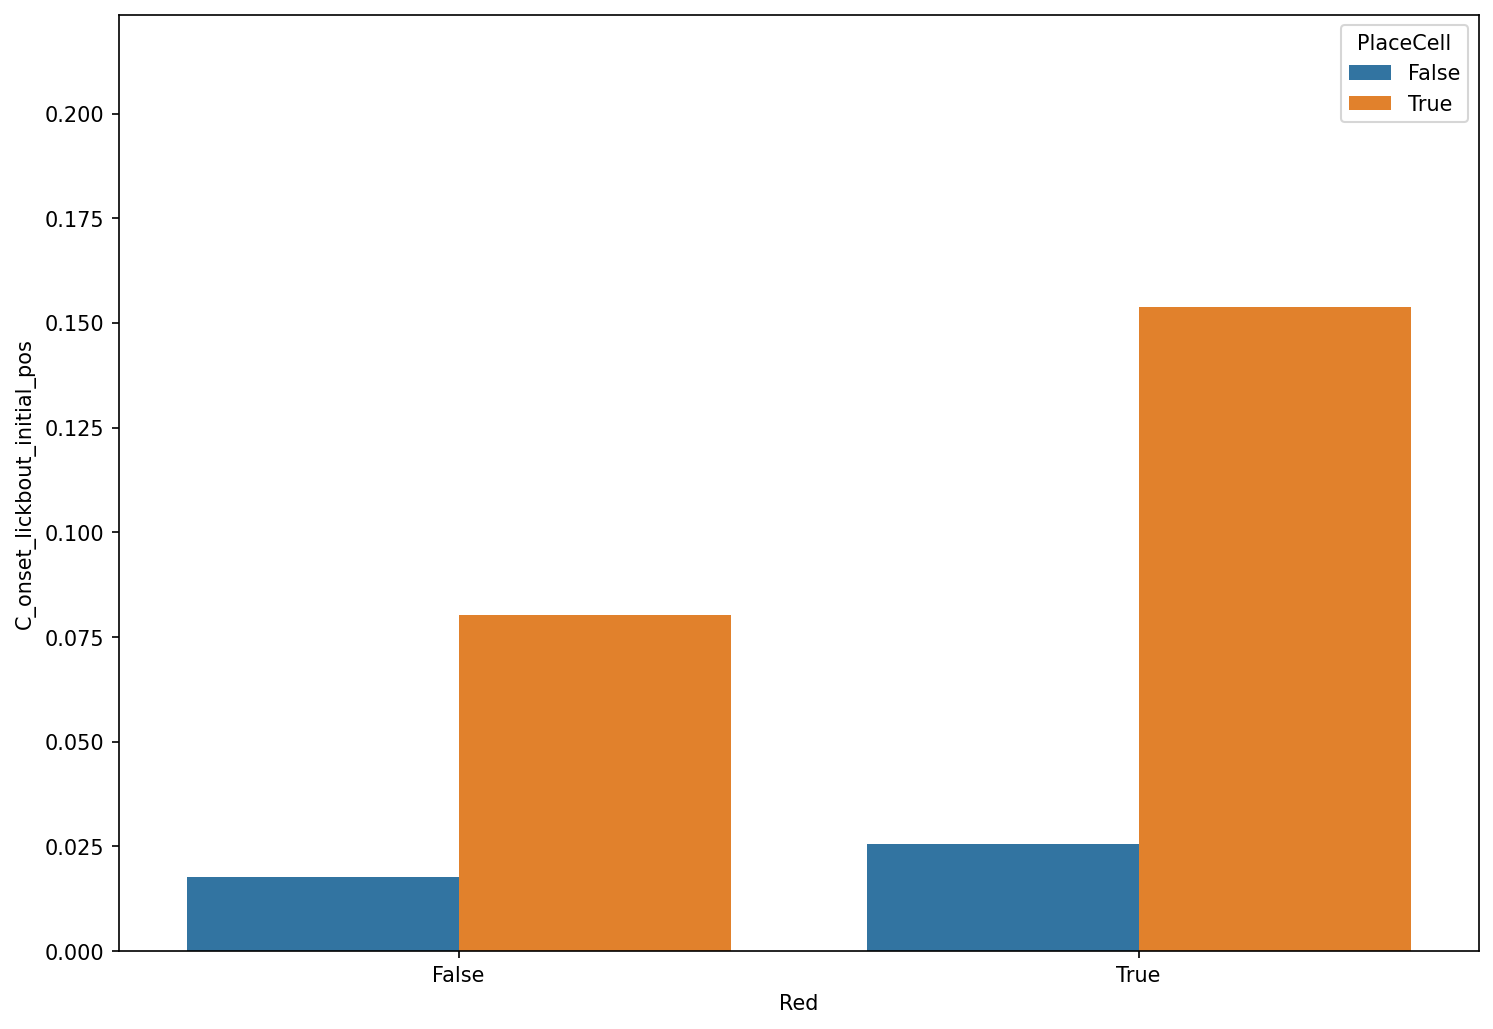

In [19]:
sns.barplot(data=comps, x='Red', hue='PlaceCell', y='C_onset_lickbout_initial_pos', errwidth=0)
print(pg.chi2_independence(comps.loc[~comps.Red], x='C_onset_lickbout_initial_pos', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.Red], x='C_onset_lickbout_initial_pos', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.PlaceCell], x='C_onset_lickbout_initial_pos', y='Red'))
print(pg.chi2_independence(comps.loc[~comps.PlaceCell], x='C_onset_lickbout_initial_pos', y='Red'))


(PlaceCell                          False        True
C_onset_lickbout_initial_neg                        
False                         2686.15767  1268.84233
True                           660.84233   312.15767, PlaceCell                      False    True
C_onset_lickbout_initial_neg                
False                         2694.5  1260.5
True                           652.5   320.5,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.409016  1.0  0.522470  0.009110  0.098015
1        cressie-read  0.666667  0.408539  1.0  0.522712  0.009105  0.097958
2      log-likelihood  0.000000  0.407595  1.0  0.523192  0.009095  0.097845
3       freeman-tukey -0.500000  0.406896  1.0  0.523549  0.009087  0.097761
4  mod-log-likelihood -1.000000  0.406204  1.0  0.523902  0.009079  0.097678
5              neyman -2.000000  0.404842  1.0  0.524599  0.009064  0.097515)
(PlaceCell                          False        True
C_onset_lic

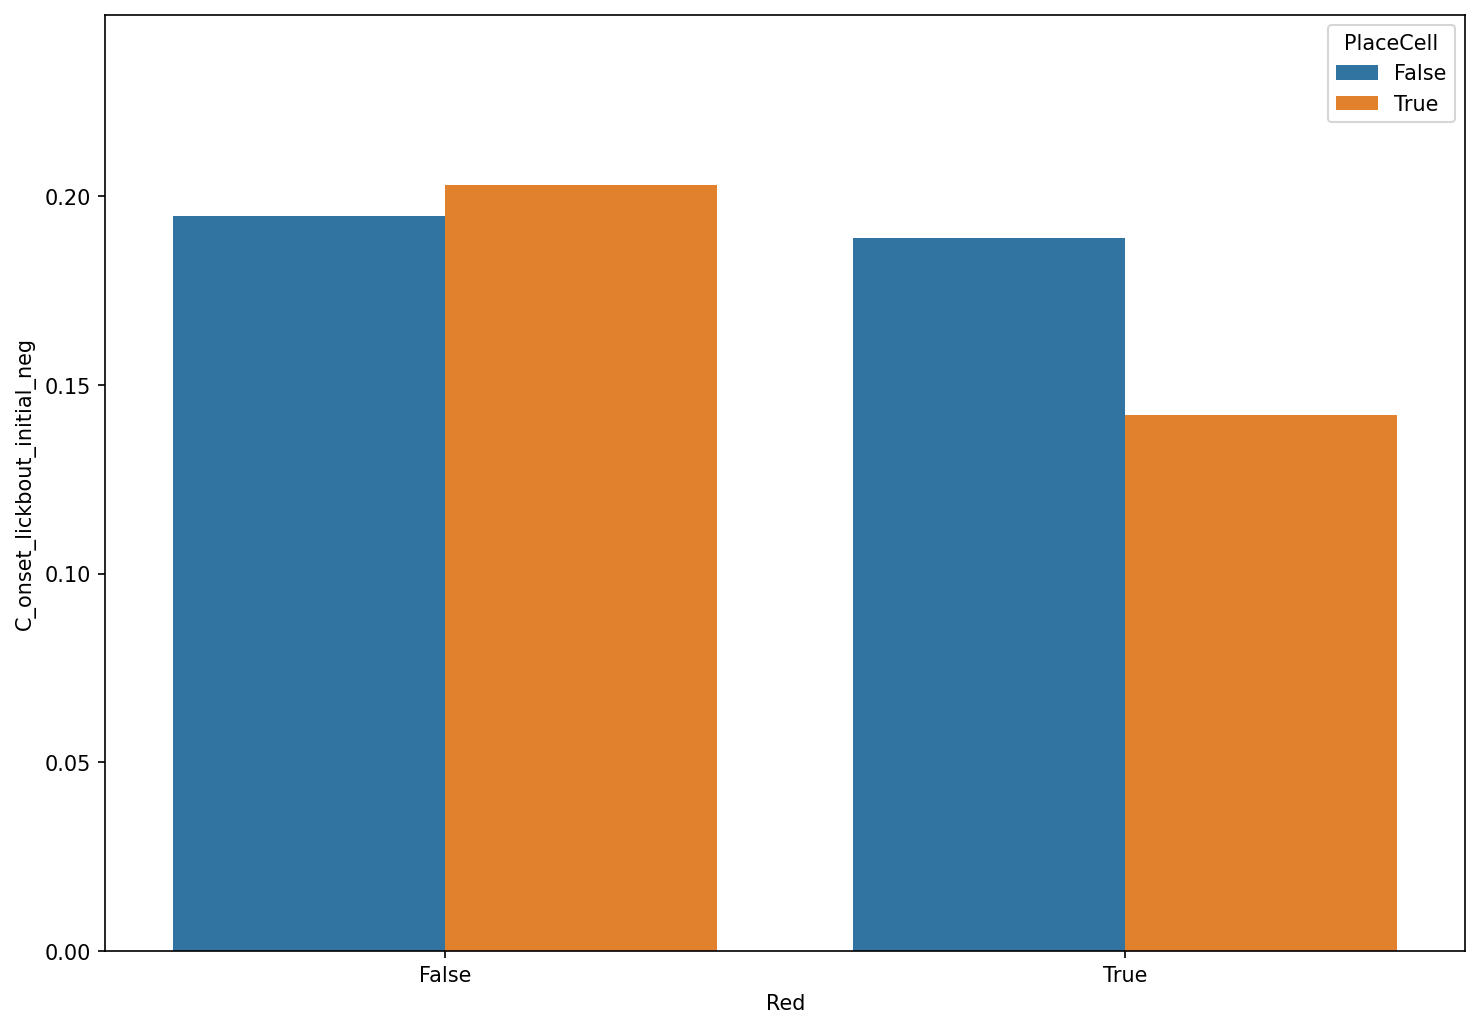

In [20]:
sns.barplot(data=comps, x='Red', hue='PlaceCell', y='C_onset_lickbout_initial_neg', errwidth=0)
print(pg.chi2_independence(comps.loc[~comps.Red], x='C_onset_lickbout_initial_neg', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.Red], x='C_onset_lickbout_initial_neg', y='PlaceCell'))
print(pg.chi2_independence(comps.loc[comps.PlaceCell], x='C_onset_lickbout_initial_neg', y='Red'))
print(pg.chi2_independence(comps.loc[~comps.PlaceCell], x='C_onset_lickbout_initial_neg', y='Red'))


In [21]:
print(pg.chi2_independence(comps.loc[comps.Red], x='C_onset_lickbout_initial_pos', y='PlaceCell'))


(PlaceCell                          False        True
C_onset_lickbout_initial_pos                        
False                         254.560811  156.439189
True                           20.439189   12.560811, PlaceCell                     False   True
C_onset_lickbout_initial_pos              
False                         267.5  143.5
True                            7.5   25.5,                  test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  23.248122  1.0  1.423894e-06  0.228824   
1        cressie-read  0.666667  22.845224  1.0  1.755851e-06  0.226833   
2      log-likelihood  0.000000  22.822490  1.0  1.776743e-06  0.226720   
3       freeman-tukey -0.500000  23.533282  1.0  1.227716e-06  0.230224   
4  mod-log-likelihood -1.000000  24.963487  1.0  5.842637e-07  0.237116   
5              neyman -2.000000  30.681195  1.0  3.040979e-08  0.262872   

      power  
0  0.997893  
1  0.997597  
2  0.997579  
3  0.998081  
4  0.998803  
5  

## Fig S10C+D

In [22]:
comps['C_onset_lickbout_initial_posN'] = comps.C_onset_lickbout_initial_pos.astype(int)

C_onset_lickbout_initial_pos_placecells_dabest = dabest.load(comps.loc[(comps.PlaceCell)], \
    idx=("Green", "Red"), x='RedC', \
    y='C_onset_lickbout_initial_posN', resamples=5000, proportional=True)
C_onset_lickbout_initial_pos_placecells_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,1581,169,Cohen's h,None,0.23139,95,0.081808,0.403656,0.0056,0.011101,-2.564796,0.001289,-3.223727,0.001305,123773.0


In [23]:
C_onset_lickbout_initial_pos_noplacecells_dabest = dabest.load(comps.loc[~(comps.PlaceCell)], \
    idx=("Green", "Red"), x='RedC', \
    y='C_onset_lickbout_initial_posN', resamples=5000, proportional=True)
C_onset_lickbout_initial_pos_noplacecells_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,3347,275,Cohen's h,None,0.054134,95,-0.059311,0.194921,0.3692,0.424315,-0.800029,0.351047,-0.932681,0.351043,456610.5


In [24]:
comps['C_onset_lickbout_initial_negN'] = comps.C_onset_lickbout_initial_neg.astype(int)

C_onset_lickbout_initial_neg_placecells_dabest = dabest.load(comps.loc[(comps.PlaceCell)], \
    idx=("Green", "Red"), x='RedC', \
    y='C_onset_lickbout_initial_negN', resamples=5000, proportional=True)
C_onset_lickbout_initial_neg_placecells_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,1581,169,Cohen's h,None,-0.162089,95,-0.315606,0.004303,0.0382,0.035037,2.121151,0.0581,1.896185,0.058137,141747.0


In [25]:
C_onset_lickbout_initial_neg_noplacecells_dabest = dabest.load(comps.loc[~(comps.PlaceCell)], \
    idx=("Green", "Red"), x='RedC', \
    y='C_onset_lickbout_initial_negN', resamples=5000, proportional=True)
C_onset_lickbout_initial_neg_noplacecells_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,3347,275,Cohen's h,None,-0.0145,95,-0.137317,0.109874,0.8128,0.816783,0.231874,0.81812,0.22998,0.818118,462840.5


Text(0.5, 1.0, 'Lick-inhibited non-place cells')

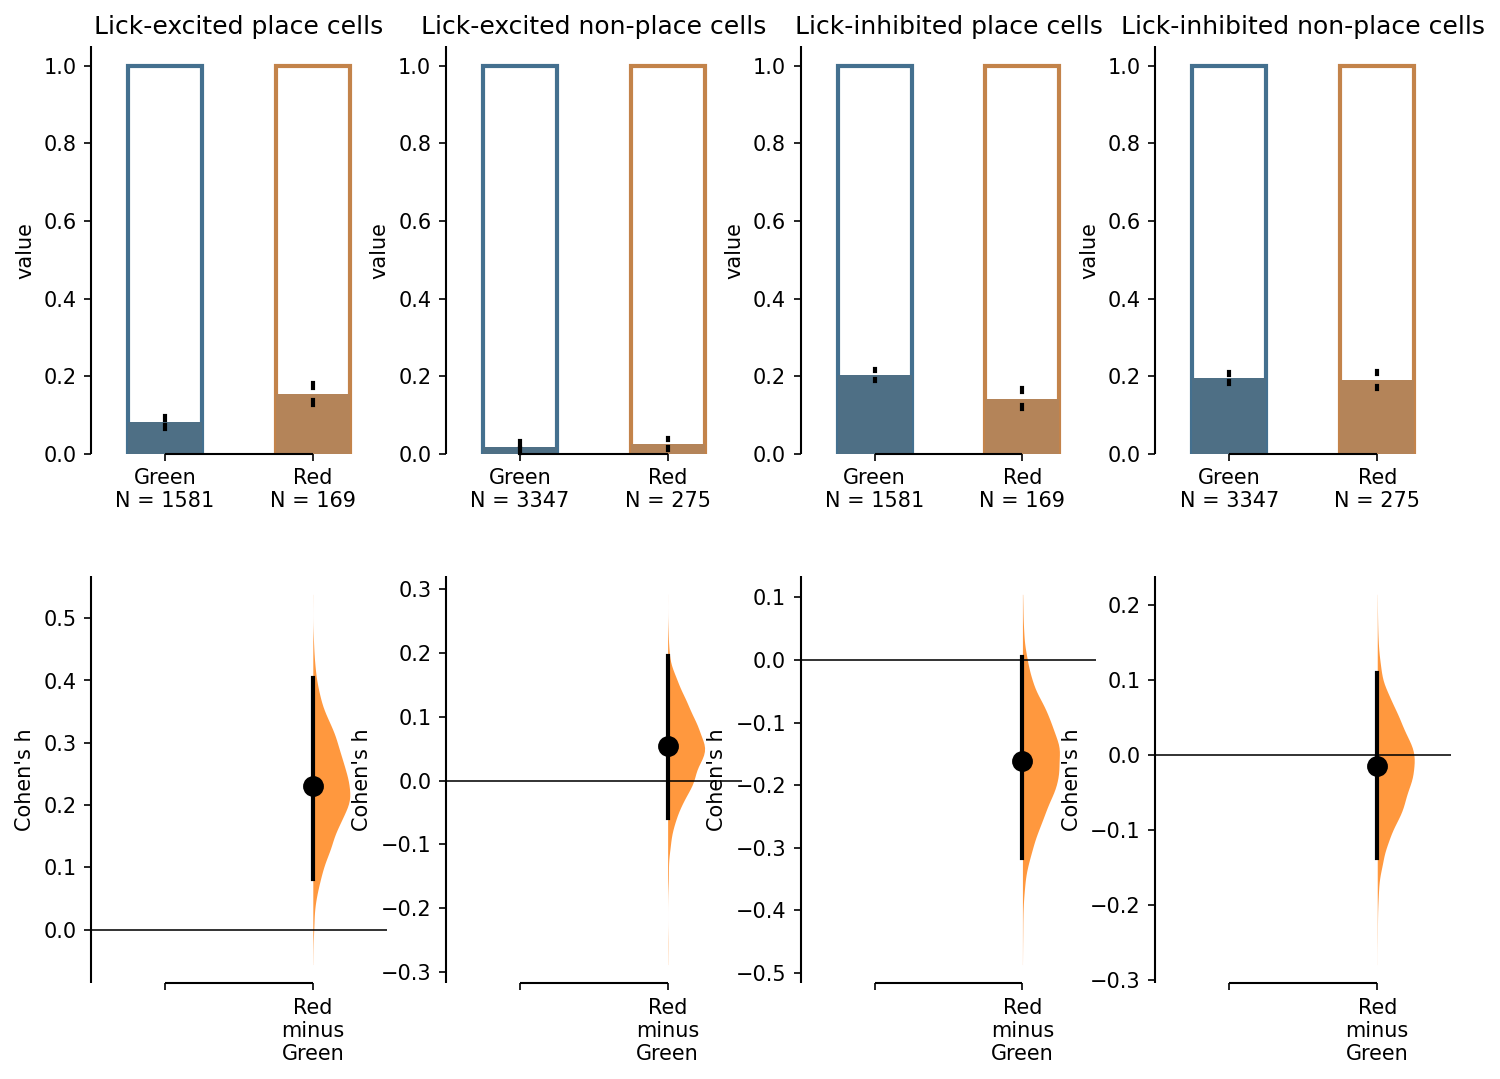

In [26]:
fig, axs=plt.subplots(1,4, sharey=True)

C_onset_lickbout_initial_pos_placecells_dabest.cohens_h.plot(float_contrast=False, ax=axs[0])
axs[0].set_title('Lick-excited place cells')
C_onset_lickbout_initial_pos_noplacecells_dabest.cohens_h.plot(float_contrast=False, ax=axs[1])
axs[1].set_title('Lick-excited non-place cells')
C_onset_lickbout_initial_neg_placecells_dabest.cohens_h.plot(float_contrast=False, ax=axs[2])
axs[2].set_title('Lick-inhibited place cells')
C_onset_lickbout_initial_neg_noplacecells_dabest.cohens_h.plot(float_contrast=False, ax=axs[3])
axs[3].set_title('Lick-inhibited non-place cells')

In [27]:
comps['C_onset_lickbout_initial_posN'] = comps.C_onset_lickbout_initial_pos.astype(int)
comps['C_onset_lickbout_initial_negN'] = comps.C_onset_lickbout_initial_neg.astype(int)


lickcells_n_df = pd.DataFrame({'red_place': comps.loc[(comps.Red)&(comps.PlaceCell), 'C_onset_lickbout_initial_negN'],
                             'red_nonplace': comps.loc[(comps.Red)&(~comps.PlaceCell), 'C_onset_lickbout_initial_negN'],
                             'green_place': comps.loc[(~comps.Red)&(comps.PlaceCell), 'C_onset_lickbout_initial_negN'],
                             'green_nonplace': comps.loc[(~comps.Red)&(~comps.PlaceCell), 'C_onset_lickbout_initial_negN'],
                             })
lickcells_n = dabest.load(lickcells_n_df.astype(float), idx=(("red_place", "red_nonplace"),
                                             ("green_place", "green_nonplace")), proportional=True)
lickcells_n.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,red_nonplace,169,275,Cohen's h,None,0.126959,95,-0.077855,0.310822,0.191,0.189829,-1.313397,0.201828,-1.278260,0.201686,22143.5
1,green_place,green_nonplace,1581,3347,Cohen's h,None,-0.020630,95,-0.082300,0.038346,0.495,0.500389,0.673958,0.497950,0.677769,0.497905,2667591.0


In [28]:
lickcells_n_T = dabest.load(lickcells_n_df.astype(float), idx=(("red_place", "green_place"),
                                             ("red_nonplace", "green_nonplace")), proportional=True)
lickcells_n_T.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,green_place,169,1581,Cohen's h,None,0.162089,95,-0.005943,0.317170,0.0394,0.035037,-2.121151,0.05810,-1.896185,0.058137,125442.0
1,red_nonplace,green_nonplace,275,3347,Cohen's h,None,0.014500,95,-0.110472,0.139168,0.8068,0.816783,-0.231874,0.81812,-0.229980,0.818118,457584.5


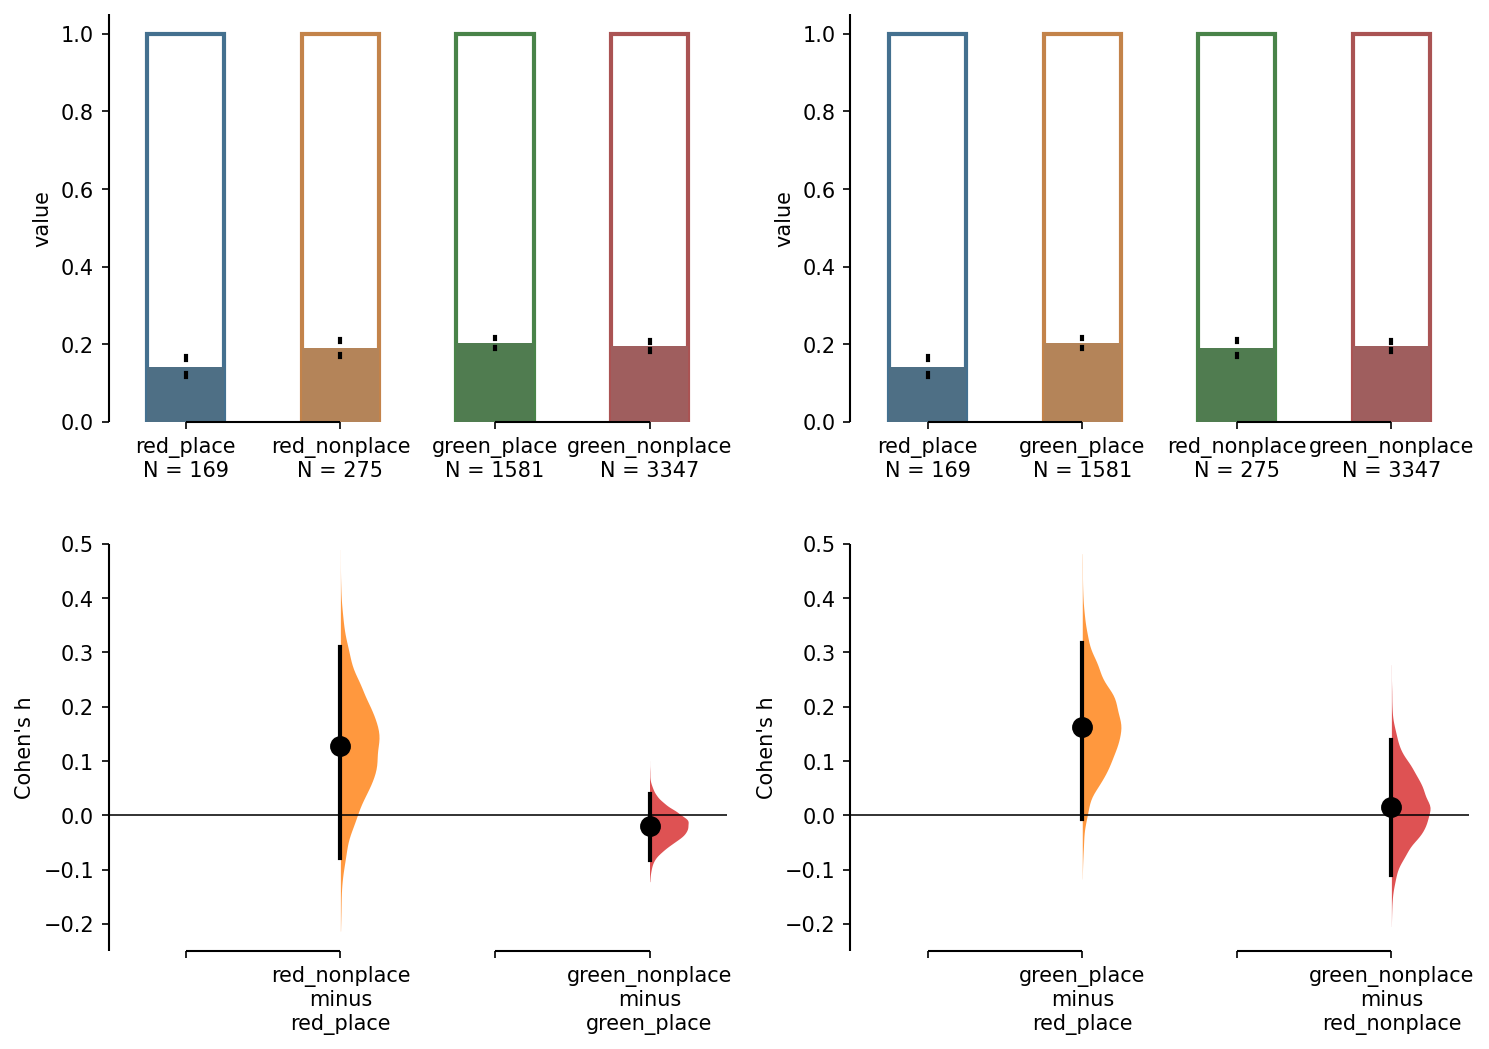

In [29]:
fig, axs = plt.subplots(1,2, sharey=True)
lickcells_n.cohens_h.plot(ax=axs[0], contrast_ylim=(-0.25, 0.5));
lickcells_n_T.cohens_h.plot(ax=axs[1], contrast_ylim=(-0.25, 0.5));

In [30]:
lickcells_p_df = pd.DataFrame({'red_place': comps.loc[(comps.Red)&(comps.PlaceCell), 'C_onset_lickbout_initial_posN'],
                             'red_nonplace': comps.loc[(comps.Red)&(~comps.PlaceCell), 'C_onset_lickbout_initial_posN'],
                             'green_place': comps.loc[(~comps.Red)&(comps.PlaceCell), 'C_onset_lickbout_initial_posN'],
                             'green_nonplace': comps.loc[(~comps.Red)&(~comps.PlaceCell), 'C_onset_lickbout_initial_posN'],
                             })
lickcells_p = dabest.load(lickcells_p_df.astype(float), idx=(("red_place", "red_nonplace"),
                                             ("green_place", "green_nonplace")), proportional=True)
lickcells_p.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,red_nonplace,169,275,Cohen's h,None,-0.485655,95,-0.675923,-0.299609,0.0,2.007949e-05,4.364434,4.049644e-07,5.144051,5.689528e-07,26221.0
1,green_place,green_nonplace,1581,3347,Cohen's h,None,-0.308399,95,-0.366746,-0.247089,0.0,6.908573e-18,8.700738,2.156218e-27,10.908438,4.274858e-27,2811698.5


In [31]:
lickcells_p_T = dabest.load(lickcells_p_df.astype(float), idx=(("red_place", "green_place"),
                                             ("red_nonplace", "green_nonplace")), proportional=True)
lickcells_p_T.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,red_place,green_place,169,1581,Cohen's h,None,-0.231390,95,-0.396790,-0.076354,0.0070,0.011101,2.564796,0.001289,3.223727,0.001305,143416.0
1,red_nonplace,green_nonplace,275,3347,Cohen's h,None,-0.054134,95,-0.200624,0.057050,0.3842,0.424315,0.800029,0.351047,0.932681,0.351043,463814.5


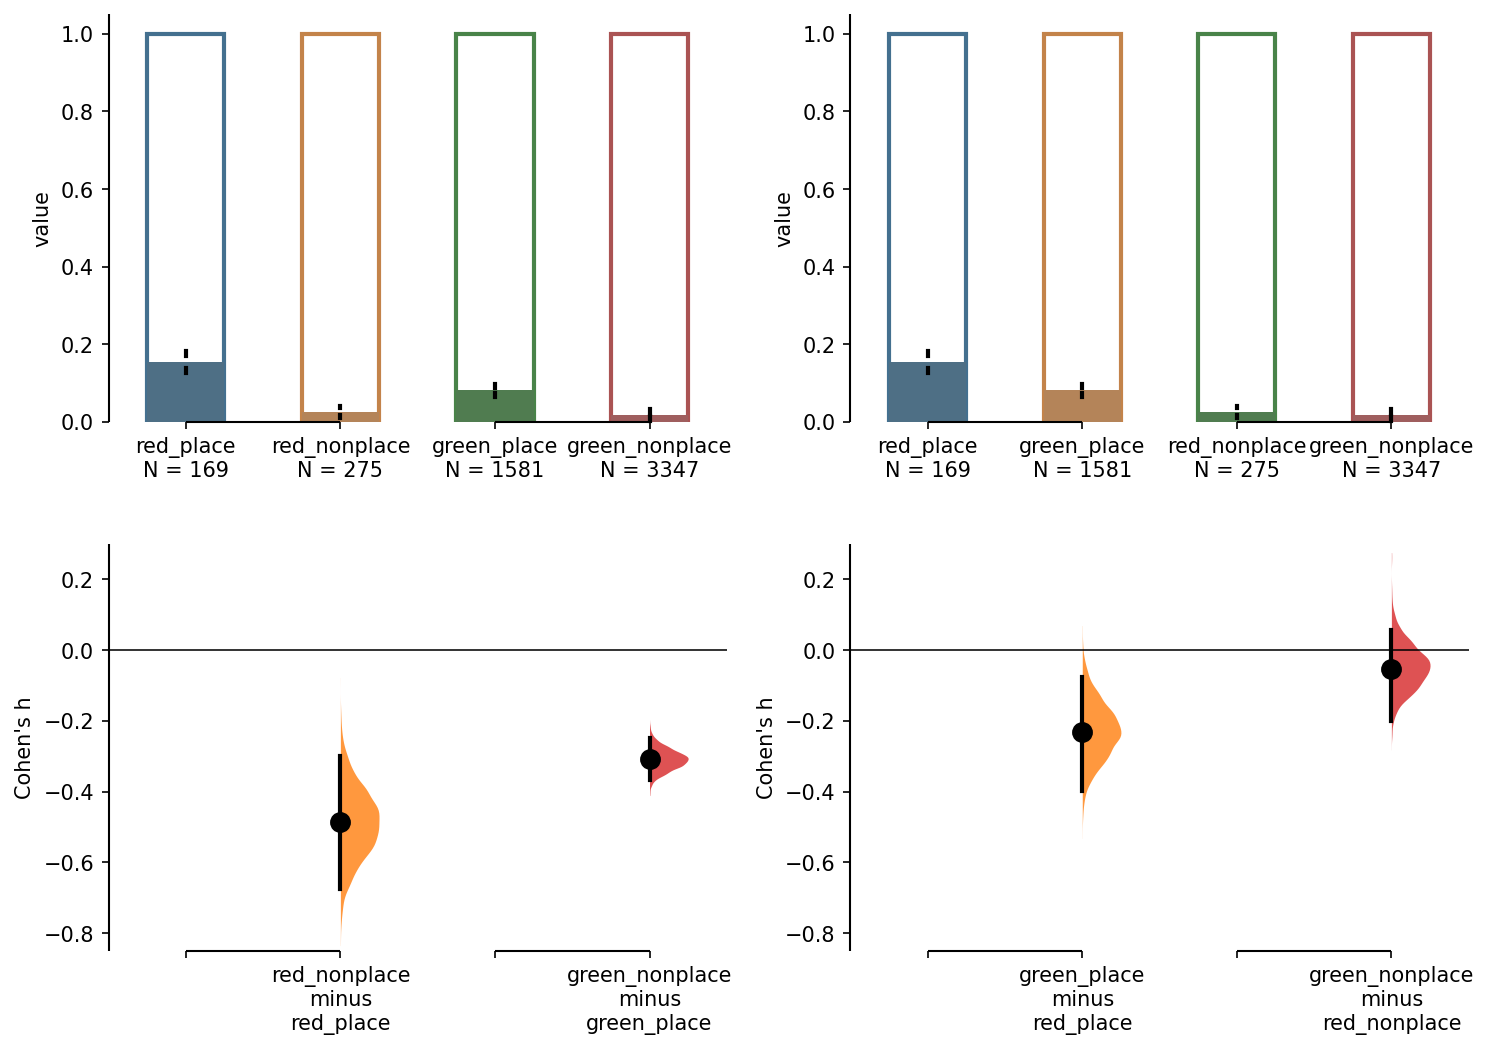

In [32]:
fig, axs = plt.subplots(1,2, sharey=True)
lickcells_p.cohens_h.plot(ax=axs[0], contrast_ylim=(-0.85, 0.3));
lickcells_p_T.cohens_h.plot(ax=axs[1], contrast_ylim=(-0.85, 0.3));

# Fig 7F: Lick x speed cell interaction

In [33]:
comps['SpeedCellstr'] = 'none'
comps.loc[comps.SpeedCell==-1, 'SpeedCellstr'] = 'negative'
comps.loc[comps.SpeedCell==1, 'SpeedCellstr'] = 'positive'


(SpeedCell                            -1        False        True
C_onset_lickbout_initial_pos                                    
False                         705.33401  3390.991883  645.674107
True                           27.66599   133.008117   25.325893, SpeedCell                      -1  False  True
C_onset_lickbout_initial_pos                  
False                         658   3425   659
True                           75     99    12,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  100.483953  2.0  1.514212e-22  0.142795   
1        cressie-read  0.666667   90.968924  2.0  1.763393e-20  0.135866   
2      log-likelihood  0.000000   77.062212  2.0  1.845667e-17  0.125050   
3       freeman-tukey -0.500000   70.013820  2.0  6.261699e-16  0.119195   
4  mod-log-likelihood -1.000000   65.139469  2.0  7.163810e-15  0.114971   
5              neyman -2.000000   60.366251  2.0  7.791754e-14  0.110678   

   power  
0    

/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


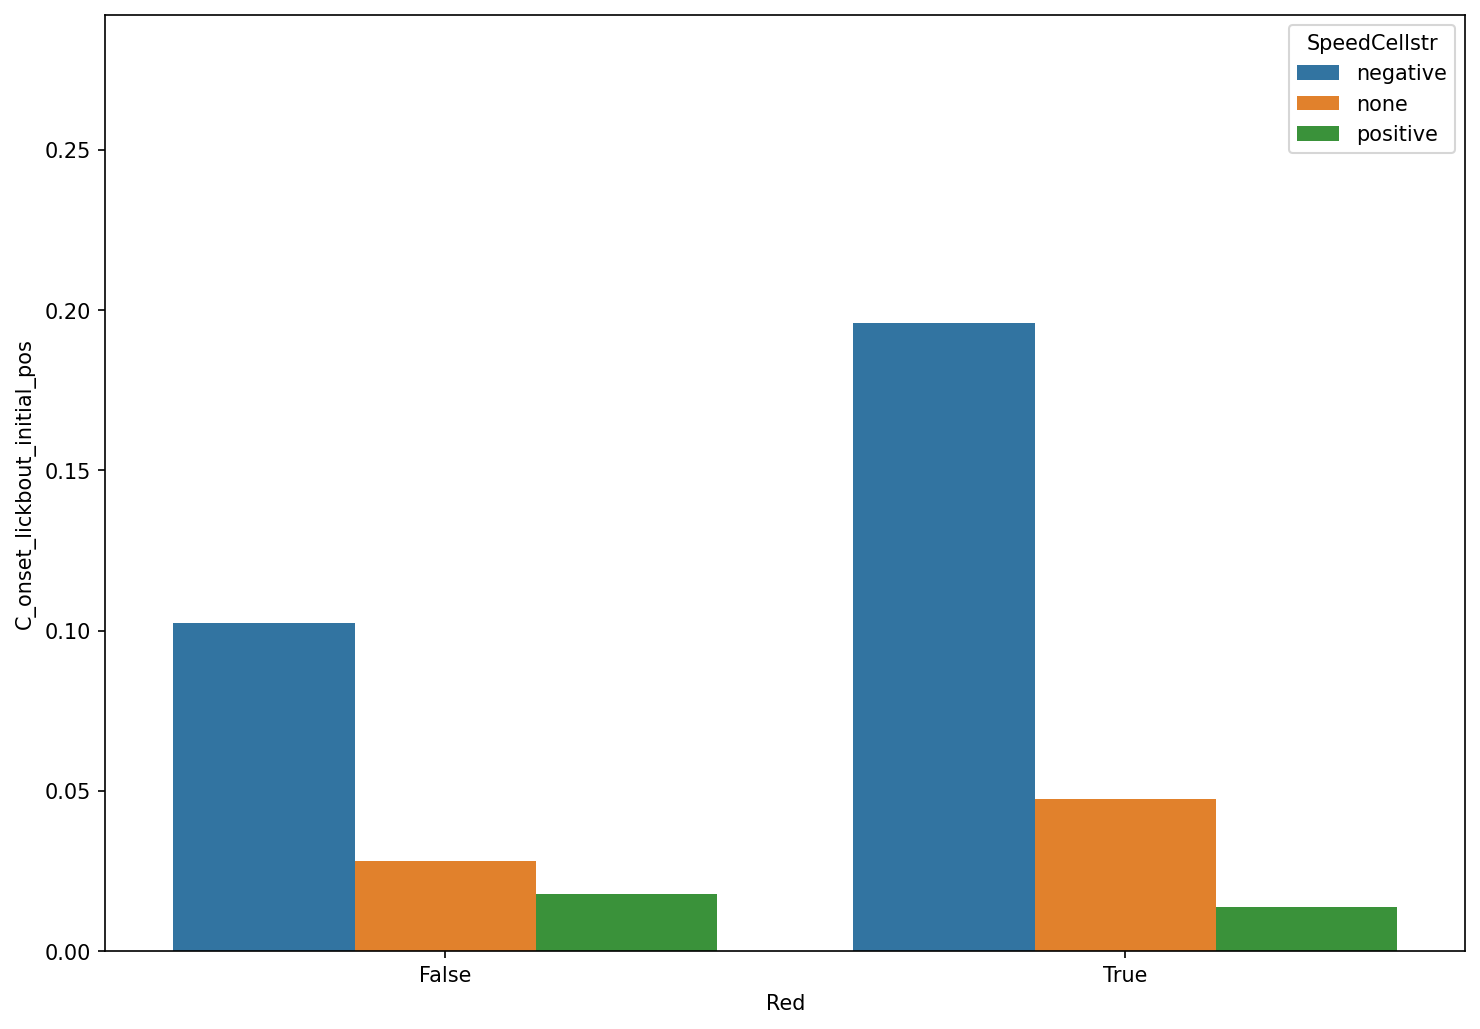

In [34]:
sns.barplot(data=comps, x='Red', y='C_onset_lickbout_initial_pos', hue='SpeedCellstr', errwidth=0, hue_order=['negative', 'none', 'positive'])
print(pg.chi2_independence(comps.loc[~comps.Red], x='C_onset_lickbout_initial_pos', y='SpeedCell'))
print(pg.chi2_independence(comps.loc[comps.Red], x='C_onset_lickbout_initial_pos', y='SpeedCell'))
print(pg.chi2_independence(comps.loc[comps.SpeedCell==-1], x='C_onset_lickbout_initial_pos', y='Red'))
print(pg.chi2_independence(comps.loc[comps.SpeedCell==False], x='C_onset_lickbout_initial_pos', y='Red'))
print(pg.chi2_independence(comps.loc[comps.SpeedCell==True], x='C_onset_lickbout_initial_pos', y='Red'))


(SpeedCell                             -1        False        True
C_onset_lickbout_initial_neg                                     
False                         588.274148  2828.210227  538.515625
True                          144.725852   695.789773  132.484375, SpeedCell                      -1  False  True
C_onset_lickbout_initial_neg                  
False                         693   2867   395
True                           40    657   276,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  290.831902  2.0  7.025140e-64  0.242933   
1        cressie-read  0.666667  286.059312  2.0  7.638528e-63  0.240931   
2      log-likelihood  0.000000  287.221939  2.0  4.271186e-63  0.241420   
3       freeman-tukey -0.500000  298.675600  2.0  1.391290e-65  0.246187   
4  mod-log-likelihood -1.000000  321.570336  2.0  1.485555e-70  0.255448   
5              neyman -2.000000  419.598203  2.0  7.680827e-92  0.291797   

   power  
0

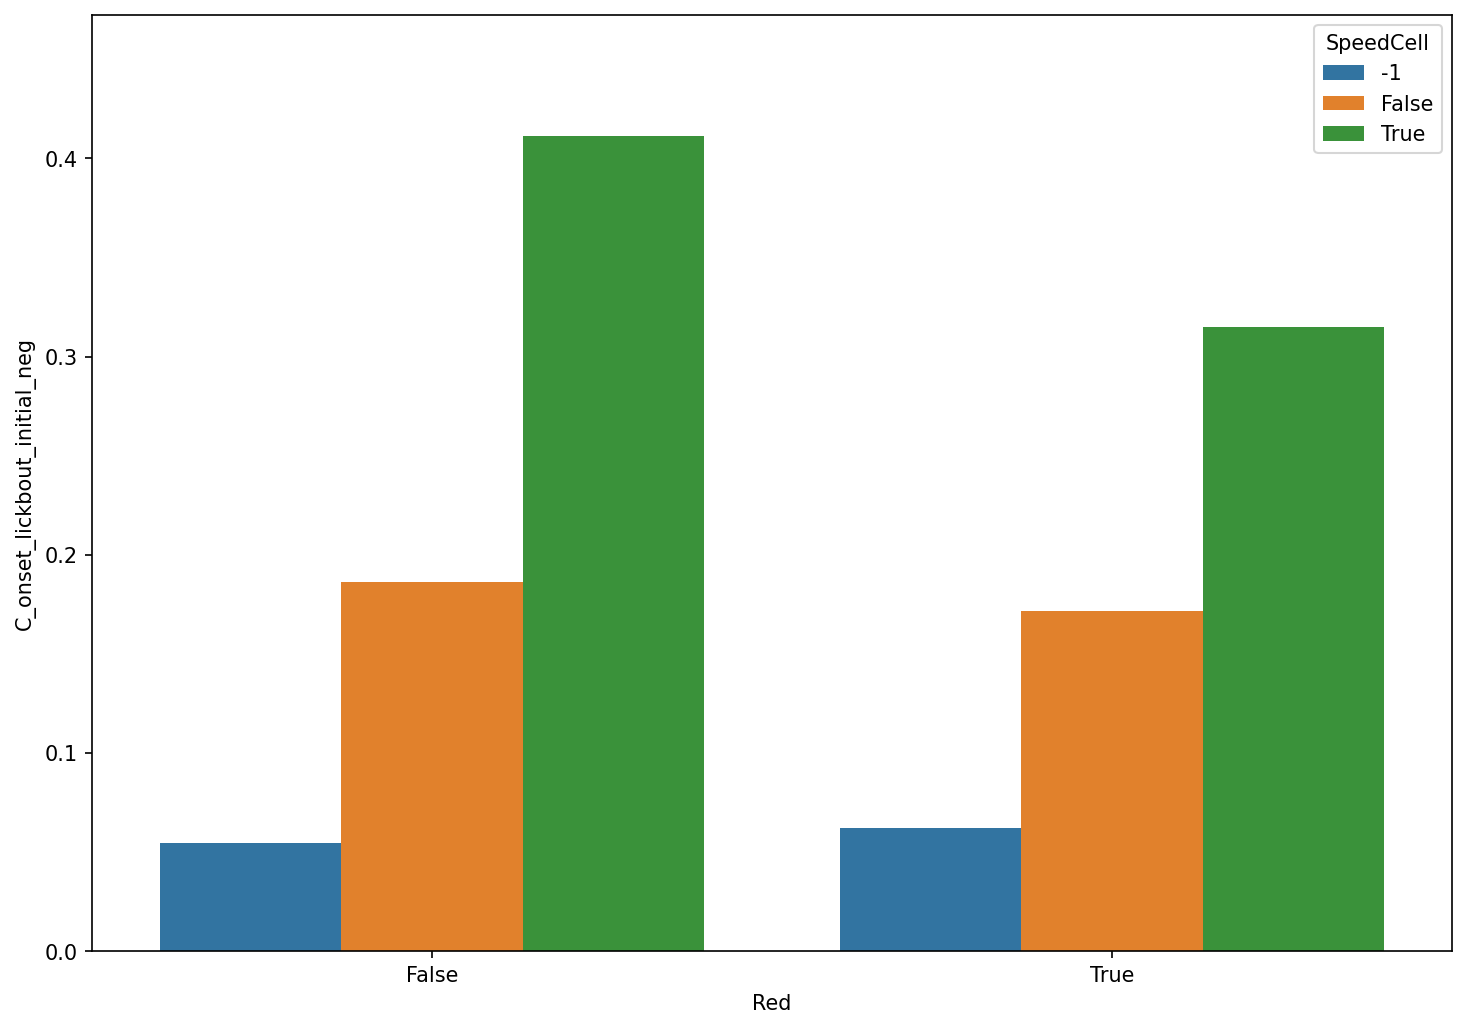

In [35]:
sns.barplot(data=comps, x='Red', hue='SpeedCell', y='C_onset_lickbout_initial_neg', errwidth=0)
print(pg.chi2_independence(comps.loc[~comps.Red], x='C_onset_lickbout_initial_neg', y='SpeedCell'))
print(pg.chi2_independence(comps.loc[comps.Red], x='C_onset_lickbout_initial_neg', y='SpeedCell'))
print(pg.chi2_independence(comps.loc[comps.SpeedCell==-1], x='C_onset_lickbout_initial_neg', y='Red'))
print(pg.chi2_independence(comps.loc[comps.SpeedCell==False], x='C_onset_lickbout_initial_neg', y='Red'))
print(pg.chi2_independence(comps.loc[comps.SpeedCell==True], x='C_onset_lickbout_initial_neg', y='Red'))

In [36]:
print(pg.chi2_independence(comps, x='C_onset_lickbout_initial_neg', y='SpeedCell'))


(SpeedCell                             -1        False        True
C_onset_lickbout_initial_neg                                     
False                         667.924423  3056.357781  598.717796
True                          162.075577   741.642219  145.282204, SpeedCell                      -1  False  True
C_onset_lickbout_initial_neg                  
False                         784   3094   445
True                           46    704   299,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  307.787071  2.0  1.461796e-67  0.239363   
1        cressie-read  0.666667  303.274420  2.0  1.395714e-66  0.237602   
2      log-likelihood  0.000000  305.324007  2.0  5.008808e-67  0.238403   
3       freeman-tukey -0.500000  317.838818  2.0  9.597929e-70  0.243240   
4  mod-log-likelihood -1.000000  342.211107  2.0  4.895559e-75  0.252394   
5              neyman -2.000000  444.685860  2.0  2.739633e-97  0.287712   

   power  
0

In [37]:
comps.groupby(['SpeedCell']).mean()['C_onset_lickbout_initial_neg']

SpeedCell
-1       0.055422
False    0.185361
True     0.401882
Name: C_onset_lickbout_initial_neg, dtype: float64

In [38]:
lickcells_p_df = pd.DataFrame({'red_speed-1': comps.loc[(comps.Red)&(comps.SpeedCell==-1), 'C_onset_lickbout_initial_pos'],
                             'red_speed0': comps.loc[(comps.Red)&(comps.SpeedCell==0), 'C_onset_lickbout_initial_pos'],
                             'red_speed1': comps.loc[(comps.Red)&(comps.SpeedCell==1), 'C_onset_lickbout_initial_pos'],
                             'green_speed-1': comps.loc[(~comps.Red)&(comps.SpeedCell==-1), 'C_onset_lickbout_initial_pos'],
                             'green_speed0': comps.loc[(~comps.Red)&(comps.SpeedCell==0), 'C_onset_lickbout_initial_pos'],
                             'green_speed1': comps.loc[(~comps.Red)&(comps.SpeedCell==1), 'C_onset_lickbout_initial_pos'],
                             })
lickcells_p_df.isnull().mean()

red_speed-1      0.981943
red_speed0       0.948995
red_speed1       0.986411
green_speed-1    0.863552
green_speed0     0.344006
green_speed1     0.875093
dtype: float64

In [39]:
lickcells_p = dabest.load(lickcells_p_df.astype(float), idx=(('green_speed-1', "red_speed-1"),
                                                             ("green_speed0", "red_speed0"),
                                                    ('green_speed1', 'red_speed1')), proportional=True)
lickcells_p.cohens_h.statistical_tests

/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/dabest/_classes.py:2047: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="upper",


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,green_speed-1,red_speed-1,733,97,Cohen's h,None,0.265753,95,0.058686,0.489643,0.0104,0.028020,-2.226165,0.006248,-2.741504,0.006326,32224.5
1,green_speed0,red_speed0,3524,274,Cohen's h,None,0.102350,95,-0.018506,0.227950,0.1080,0.142597,-1.470059,0.068189,-1.824273,0.068210,473445.0
2,green_speed1,red_speed1,671,73,Cohen's h,None,-0.033644,95,-0.300155,0.299689,0.6352,0.775376,0.286178,0.795835,0.258835,0.796612,24594.0


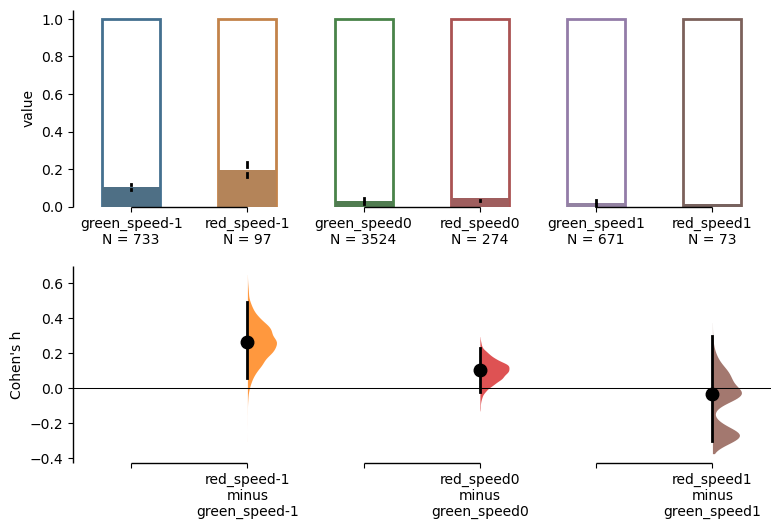

In [40]:
lickcells_p.cohens_h.plot();

In [41]:
lickcells_p_T = dabest.load(lickcells_p_df.astype(float), idx=(("green_speed0", 'green_speed-1', 'green_speed1'),
                                                             ("red_speed0", "red_speed-1", 'red_speed1')),
                                                              proportional=True)
lickcells_p_T.cohens_h.statistical_tests

/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/dabest/_classes.py:2047: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="upper",


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,green_speed0,green_speed-1,3524,733,Cohen's h,None,0.314383,95,0.238234,0.396306,0.0000,2.149249e-10,-6.430707,1.717958e-20,-9.326237,2.622003e-20,1195679.5
1,green_speed0,green_speed1,3524,671,Cohen's h,None,-0.068546,95,-0.149117,0.019031,0.0896,8.008764e-02,1.751786,1.310520e-01,1.510262,1.310514e-01,1194372.5
2,red_speed0,red_speed-1,274,97,Cohen's h,None,0.477786,95,0.246131,0.720187,0.0010,6.782116e-04,-3.492482,6.126506e-06,-4.588532,7.899753e-06,11316.5
3,red_speed0,red_speed1,274,73,Cohen's h,None,-0.204539,95,-0.488129,0.178082,0.0822,7.397746e-02,1.795646,1.939456e-01,1.301530,1.941842e-01,10338.5


In [42]:
lickcells_p_T.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,green_speed0,green_speed-1,3524,733,Cohen's h,None,0.314383,95,0.238234,0.396306,0.0000,2.149249e-10,-6.430707,1.717958e-20,-9.326237,2.622003e-20,1195679.5
1,green_speed0,green_speed1,3524,671,Cohen's h,None,-0.068546,95,-0.149117,0.019031,0.0896,8.008764e-02,1.751786,1.310520e-01,1.510262,1.310514e-01,1194372.5
2,red_speed0,red_speed-1,274,97,Cohen's h,None,0.477786,95,0.246131,0.720187,0.0010,6.782116e-04,-3.492482,6.126506e-06,-4.588532,7.899753e-06,11316.5
3,red_speed0,red_speed1,274,73,Cohen's h,None,-0.204539,95,-0.488129,0.178082,0.0822,7.397746e-02,1.795646,1.939456e-01,1.301530,1.941842e-01,10338.5


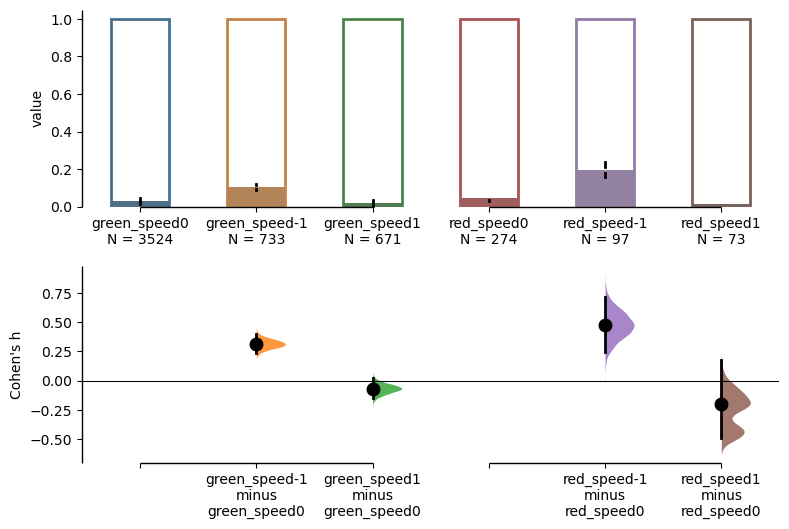

In [43]:
lickcells_p_T.cohens_h.plot();

In [44]:
lickcells_n_df = pd.DataFrame({'red_speed-1': comps.loc[(comps.Red)&(comps.SpeedCell==-1), 'C_onset_lickbout_initial_neg'],
                             'red_speed0': comps.loc[(comps.Red)&(comps.SpeedCell==0), 'C_onset_lickbout_initial_neg'],
                             'red_speed1': comps.loc[(comps.Red)&(comps.SpeedCell==1), 'C_onset_lickbout_initial_neg'],
                             'green_speed-1': comps.loc[(~comps.Red)&(comps.SpeedCell==-1), 'C_onset_lickbout_initial_neg'],
                             'green_speed0': comps.loc[(~comps.Red)&(comps.SpeedCell==0), 'C_onset_lickbout_initial_neg'],
                             'green_speed1': comps.loc[(~comps.Red)&(comps.SpeedCell==1), 'C_onset_lickbout_initial_neg'],
                             })
lickcells_n_df.isnull().mean()

red_speed-1      0.981943
red_speed0       0.948995
red_speed1       0.986411
green_speed-1    0.863552
green_speed0     0.344006
green_speed1     0.875093
dtype: float64

In [45]:
lickcells_n = dabest.load(lickcells_n_df.astype(float), idx=(('green_speed-1', "red_speed-1"),
                                                             ("green_speed0", "red_speed0"),
                                                    ('green_speed1', 'red_speed1')), proportional=True)
lickcells_n.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,green_speed-1,red_speed-1,733,97,Cohen's h,None,0.031130,95,-0.165033,0.278243,0.6408,0.779637,-0.280425,0.768549,-0.294370,0.768786,35291.5
1,green_speed0,red_speed0,3524,274,Cohen's h,None,-0.038884,95,-0.160505,0.084785,0.5106,0.530614,0.627753,0.540990,0.611372,0.540948,489983.0
2,green_speed1,red_speed1,671,73,Cohen's h,None,-0.200571,95,-0.445521,0.041192,0.1020,0.100194,1.660946,0.111445,1.593629,0.111465,26849.0


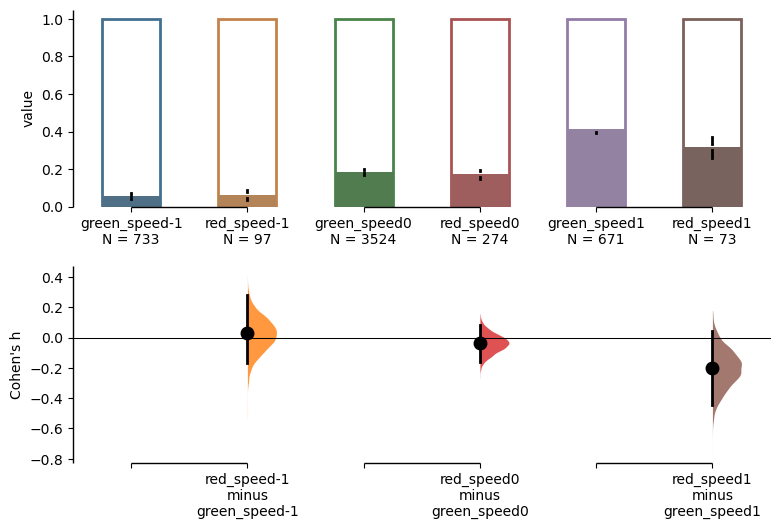

In [46]:
lickcells_n.cohens_h.plot();

In [47]:
lickcells_n_T = dabest.load(lickcells_n_df.astype(float), idx=(("green_speed0", 'green_speed-1', 'green_speed1'),
                                                             ("red_speed0", "red_speed-1", 'red_speed1')),
                                                              proportional=True)
lickcells_n_T.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,green_speed0,green_speed-1,3524,733,Cohen's h,None,-0.421373,95,-0.498602,-0.341865,0.0000,8.578548e-34,12.375619,1.187683e-18,8.856796,1.674854e-18,1461856.5
1,green_speed0,green_speed1,3524,671,Cohen's h,None,0.499571,95,0.417996,0.577424,0.0000,3.742784e-27,-11.182467,1.955333e-38,-13.095886,1.010679e-37,916413.5
2,red_speed0,red_speed-1,274,97,Cohen's h,None,-0.351359,95,-0.575513,-0.097162,0.0018,1.218892e-03,3.269910,7.893991e-03,2.671147,8.088225e-03,14746.5
3,red_speed0,red_speed1,274,73,Cohen's h,None,0.337884,95,0.077233,0.600754,0.0094,1.735303e-02,-2.420058,6.520496e-03,-2.737044,6.712507e-03,8565.5


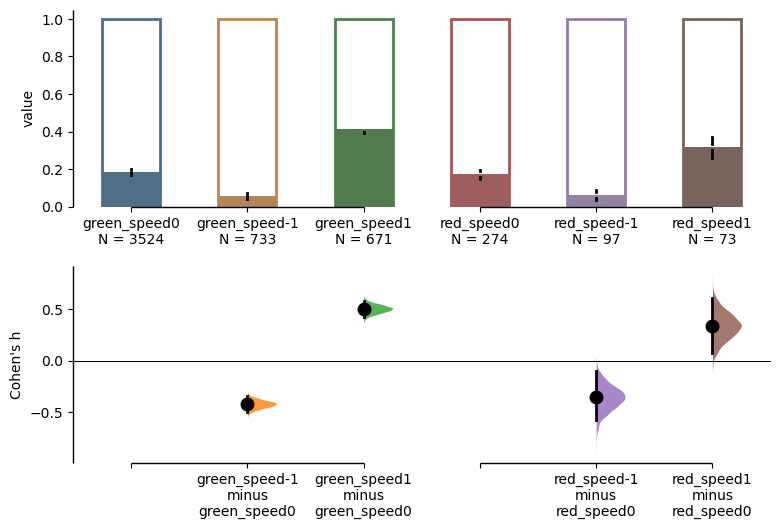

In [48]:
lickcells_n_T.cohens_h.plot();

# Fig 7E: histogram licking x velocity

In [49]:
comps['C_onset_lickbout_initial_posneg'] = np.nan
comps.loc[comps.C_onset_lickbout_initial_neg, 'C_onset_lickbout_initial_posneg'] = 'neg'
comps.loc[comps.C_onset_lickbout_initial_pos, 'C_onset_lickbout_initial_posneg'] = 'pos'


<AxesSubplot:xlabel='VeloCorrelation', ylabel='Probability'>

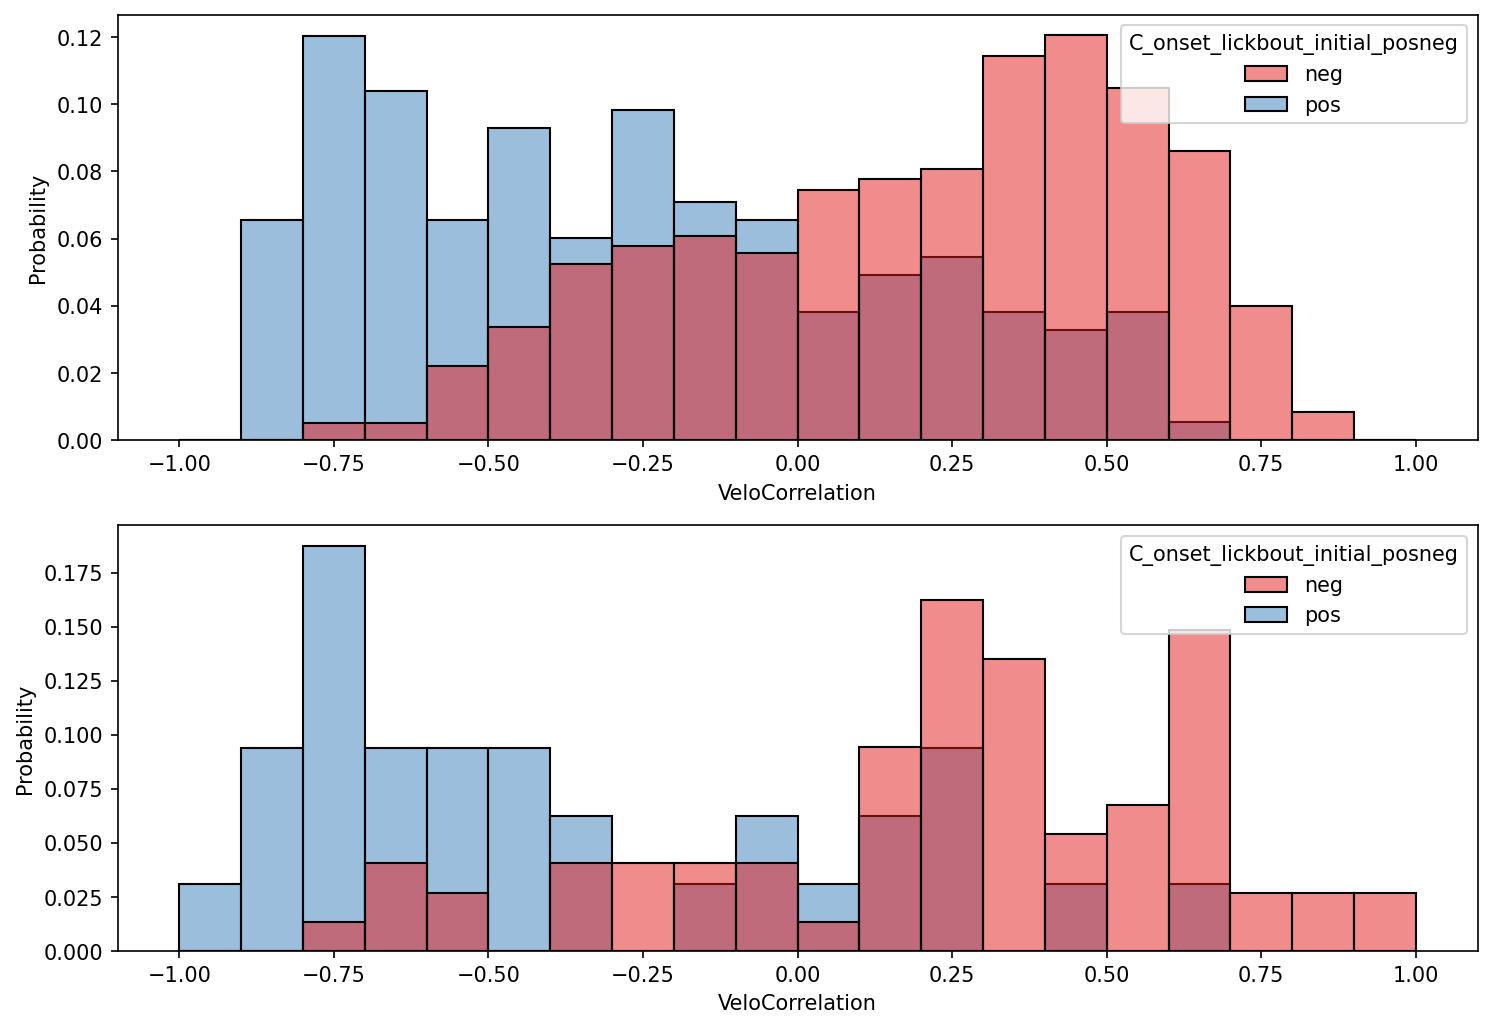

In [50]:
fig, axs = plt.subplots(2, 1)
sns.histplot(data=comps.loc[~comps.Red], x='VeloCorrelation', hue='C_onset_lickbout_initial_posneg', ax=axs[0], palette='Set1', 
    stat='probability', binrange=[-1, 1], bins=20, common_norm=False, hue_order=['neg', 'pos'])
sns.histplot(data=comps.loc[comps.Red], x='VeloCorrelation', hue='C_onset_lickbout_initial_posneg', ax=axs[1], palette='Set1', 
    stat='probability', binrange=[-1, 1], bins=20, common_norm=False, hue_order=['neg', 'pos'])